In [3]:
from pathlib import Path
import numpy as np
import dask.array as da
import mmap
import pandas as pd
import scipy
from scipy import interpolate
from scipy import fftpack
from scipy import signal
import matplotlib.pyplot as plt






In [15]:
ttl = np.load("C:/Users/AudreyHay/Desktop/openephys/2024-02-28_09-41-48/Record_Node_103/experiment1/recording1/events/Acquisition_Board-100.Rhythm Data/TTL/timestamps.npy")
print(ttl)
ttl.size

[ 4536.641   4536.651   4541.8585  4541.8685  4547.076   4547.086
  4552.2935  4552.3035  4557.511   4557.521   4562.728   4562.738
  4567.9455  4567.9555  4573.163   4573.173   4578.38    4578.3905
  4583.5975  4583.6075  4588.815   4588.825   4594.0325  4594.0425
  4599.2495  4599.2595  4604.467   4604.477   4609.6845  4609.6945
  4614.902   4614.912   4620.119   4620.129   4625.3365  4625.3465
  4630.554   4630.564   4635.7715  4635.7815  4640.9885  4640.9985
  4646.206   4646.216   5728.401   5728.411   5733.6185  5733.6285
  5738.836   5738.846   5744.0535  5744.0635  5749.2705  5749.281
  5754.488   5754.498   5759.7055  5759.7155  5764.923   5764.933
  5770.14    5770.1505  5775.3575  5775.3675  5780.575   5780.585
  5785.7925  5785.8025  5791.0095  5791.0195  5796.227   5796.237
  5801.4445  5801.4545  6870.409   6870.419   6875.6265  6875.6365
  6880.844   6880.854   6886.0615  6886.0715  6891.2785  6891.289
  6896.496   6896.506   6901.7135  6901.7235  6906.931   6906.941
  6

424

In [7]:
#%matplotlib widget

# mmap activated to not store everything in memory

def other_mmap(filename, shape, dtype, chunks):
    with open(filename, "rb") as fh:
        # `mmap` duplicates the file descriptor
        # `0` means map the full file
        mm = mmap.mmap(fh.fileno(), 0, access=mmap.ACCESS_READ)

    # coerce to NumPy array of expected type and shape
    a = np.asarray(mm).view(dtype).reshape(shape)

    # Don't call `asarray`
    # name=False to avoid hashing
    a_d = da.from_array(a, chunks=chunks, asarray=False, name=False)
    return a_d

folder_base = Path('C:/Users/AudreyHay/Desktop/openephys/2024-02-28_09-41-48/Record_Node_103/experiment1/recording1/continuous/Acquisition_Board-100.Rhythm Data/')
#folder_base = Path('/mnt/data/ahay/')
filename = folder_base / f'RawDataChannelExtractedDS2.npy'
All = np.load(filename, mmap_mode= 'r')
All = All.T
EMG = All[:,25] # canal de l'EMG = 58 // 58-32 = 26 // 0 based = 26-1 = 25
EMG.shape

(21753216,)

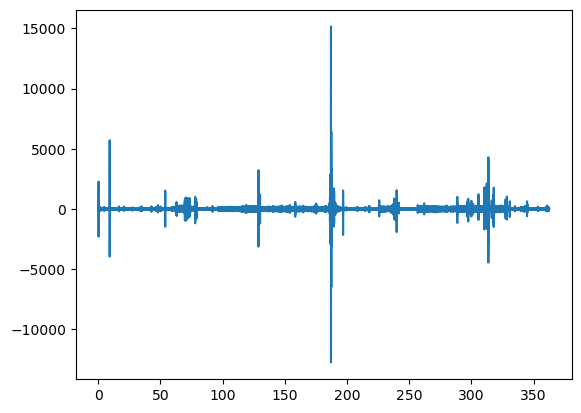

In [12]:
# Filter parameter :
f_lowcut = 200.
f_hicut = 400.
N = 4
fs = 1000
nyq = 0.5 * fs
Wn = [f_lowcut/nyq,f_hicut/nyq]  # Nyquist frequency fraction


# Filter creation :
b, a = signal.butter(N, Wn, 'band')
filt_EMG = signal.filtfilt(b, a, EMG)

# Plot
times = np.arange(0, EMG.size/fs, 1./fs)
timesmin = np.arange(0, EMG.size/fs/60, 1./fs/60)

fig, ax = plt.subplots()
ax.plot(timesmin[:22000*fs], filt_EMG[:22000*fs])